In [ ]:
#EXERCICE1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
data1 = pd.read_csv("E:/projet titanic ML/test.csv")
data2 = pd.read_csv("E:/projet titanic ML/train.csv")
data1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
data2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1.exploration des données
## CHECKLIST DE BASE
### Analyse de forme:
- **variable target**: Survived
- **lignes et colonnes**:(891, 12)
- **types de variables**: quantitative : 7, qualitatives : 5
- **analyse des valeurs manquantes** : très peu de valeurs manquantes. les colonnes comportants des valeurs manquantes sont Age:19% et Cabin:77%

### Analyse de fond :
- **visualisation de la target** : 38% de survie
- **Relation variable / Target**: les variables pertinentes : Age,Pclass, Sex,Embarked, Fare.
- je n'ai pas bien saisi l'impact de SibSp	et de Parch, ils seront peux être utilisés mais pas sûr
   
   


In [ ]:
df = data2.copy()
df_2 = data1.copy()

In [ ]:
df.shape

(891, 12)

In [ ]:
df.dtypes.value_counts()

int64      5
object     5
float64    2
Name: count, dtype: int64

<Axes: >

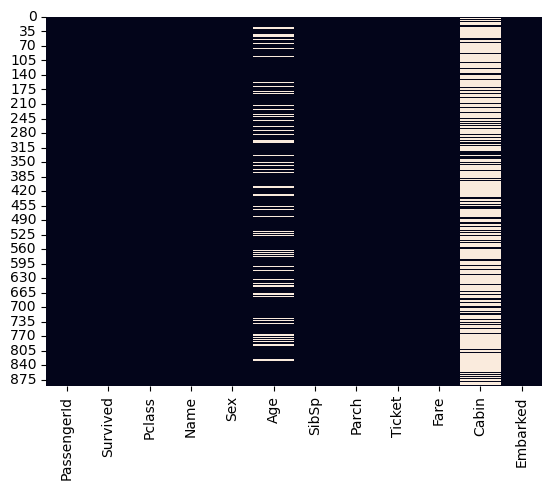

In [ ]:
plt.figure()
sns.heatmap(df.isna(), cbar=False)

In [ ]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
Age            0.198653
Cabin          0.771044
dtype: float64

### Analyse de fond 
#### 1- Elimination des colonnes inutiles 

In [ ]:
df = df[df.columns[df.isna().sum()/df.shape[0] < 0.77]]

<Axes: >

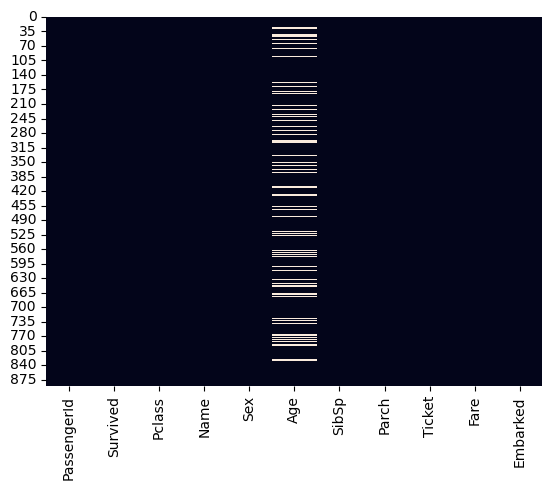

In [ ]:
plt.figure()
sns.heatmap(df.isna(), cbar=False)

In [ ]:
df= df.drop('PassengerId',axis=1)
df= df.drop('Name',axis=1)
df_2 = df_2.drop('PassengerId',axis=1)
df_2 = df_2.drop('Name',axis=1)
df_2 = df_2.drop('Cabin',axis=1)
df_2 = df_2.drop('Ticket', axis=1)

In [ ]:
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


### Visualisation de la target 

In [ ]:
df['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

### Relation variable / Target
#### Création des sous ensembles survie et mort 

In [ ]:
survie_df = df[df['Survived'] == 1]

In [ ]:
mort_df = df[df['Survived'] == 0]

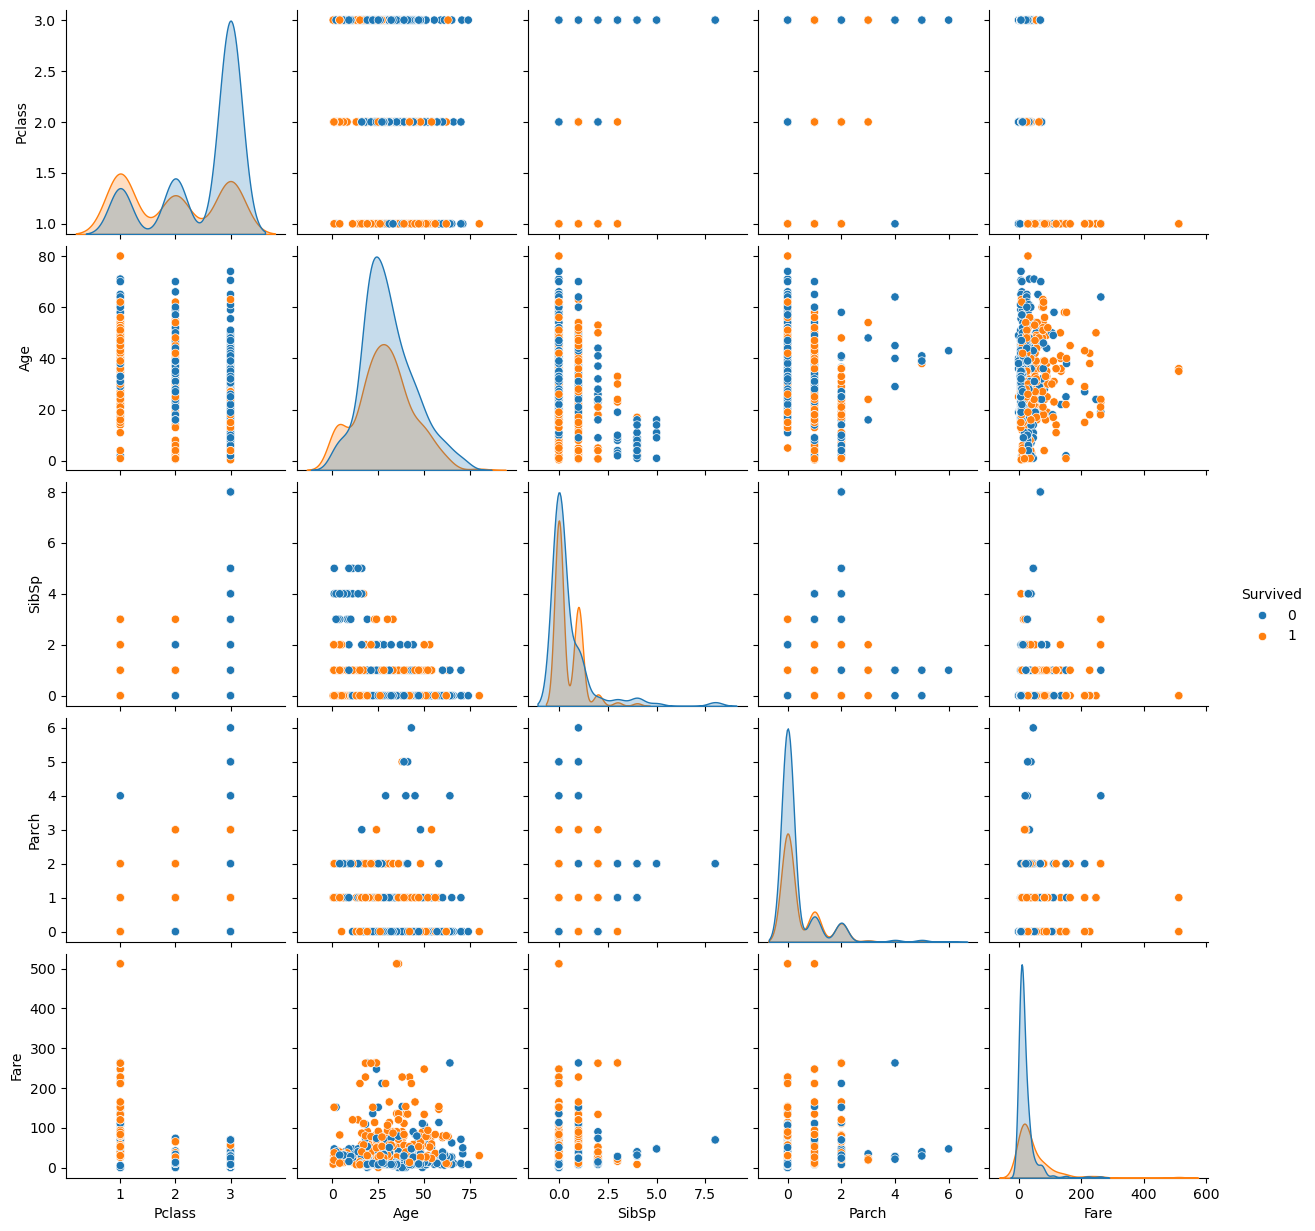

In [ ]:
sns.pairplot(df, hue = 'Survived', vars=['Pclass', 'Age', 'SibSp', 'Parch', 
                                        'Fare',])

<Axes: xlabel='Pclass', ylabel='Survived'>

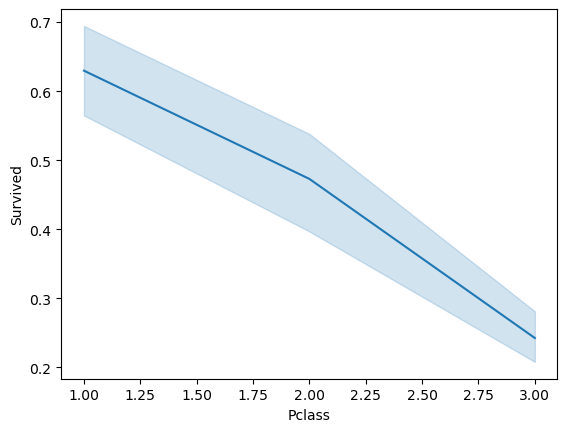

In [ ]:
plt.figure()
#correlation_matrix = df[['Pclass','Survived']].corr()
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
sns.lineplot(data=df, x='Pclass', y ='Survived')

<Axes: >

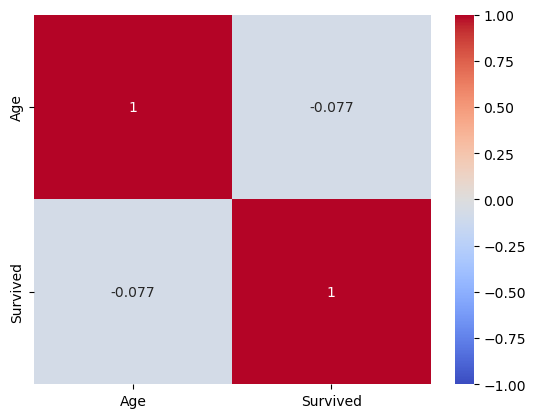

In [ ]:
plt.figure()
correlation_matrix = df[['Age','Survived']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
#sns.lineplot(data=df, x='Age', y='Survived')


<Axes: >

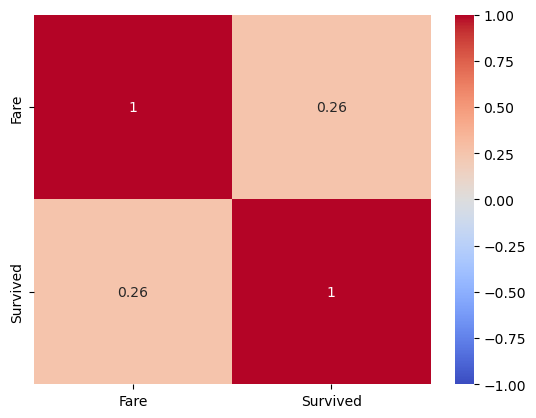

In [ ]:
plt.figure()
#sns.histplot(data=df, x='Fare', hue='Survived')
correlation_matrix = df[['Fare','Survived']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
#sns.lineplot(data=df, x='Fare', y='Survived')

In [ ]:
df_encoded = df.copy()

In [ ]:
df_encoded['Sex'] = df_encoded['Sex'].map({'male': 0, 'female': 1})
df_encoded['Embarked'] = df_encoded['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

<Axes: xlabel='Sex', ylabel='Count'>

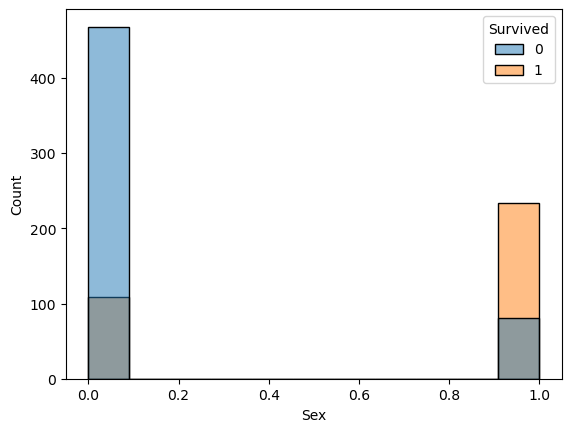

In [ ]:
plt.figure()
sns.histplot(data=df_encoded, x='Sex', hue='Survived')

<Axes: xlabel='Embarked', ylabel='Survived'>

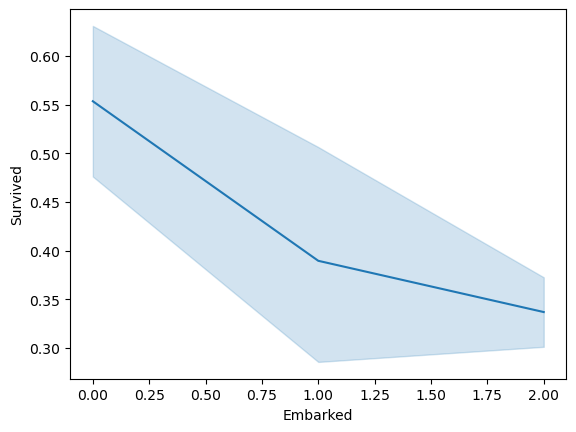

In [ ]:
plt.figure()
#sns.histplot(data=df_encoded, x='Embarked', hue='Survived')
#correlation_matrix = df_encoded[['Embarked','Survived']].corr()
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
sns.lineplot(data=df_encoded, x='Embarked', y='Survived')

In [ ]:
df_encoded.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,0,22.0,1,0,A/5 21171,7.2500,2.0
1,1,1,1,38.0,1,0,PC 17599,71.2833,0.0
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,2.0
3,1,1,1,35.0,1,0,113803,53.1000,2.0
4,0,3,0,35.0,0,0,373450,8.0500,2.0


<Axes: xlabel='SibSp', ylabel='Survived'>

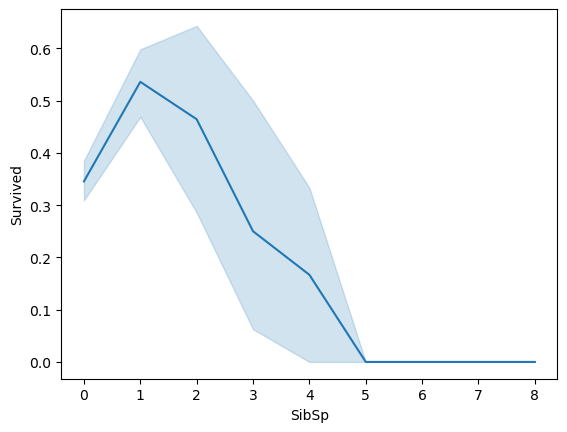

In [ ]:
plt.figure()
#sns.histplot(data=df_encoded, x='SibSp', hue='Survived')
#correlation_matrix = df[['SibSp','Survived']].corr()
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
sns.lineplot(data=df, x='SibSp', y='Survived')

<Axes: xlabel='Parch', ylabel='Survived'>

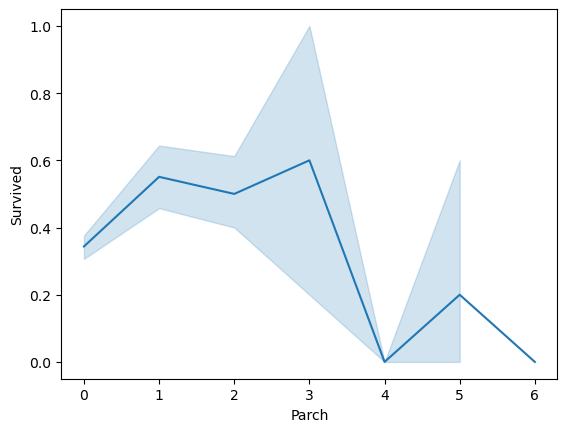

In [ ]:
plt.figure()
#sns.boxplot(x='Survived', y='Parch', data=df, hue='Survived')
#correlation_matrix = df[['Parch','Survived']].corr()
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
sns.lineplot(data=df, x='Parch', y='Survived')

### Preprocessing 
#### Gestion des valeurs manquantes : 
- **colonne Cabin** : supprimée
- **colonne Age** : imputation des valeurs manquantes par la moyenne
- **collonne Embarked** : imputation des valeurs manquantes par la valeur du mode 

In [ ]:
df = data2.copy()
df = df[df.columns[df.isna().sum()/df.shape[0] < 0.77]]
df= df.drop('PassengerId',axis=1)
df= df.drop('Name',axis=1)
df.head()
data = df.drop('Ticket', axis=1).copy()


#### Imputation des valeurs manquantes dans Age et dans Embarked 


In [ ]:
df = df.fillna(df['Age'].median())

In [ ]:
df = df.fillna(df['Embarked'].mode()[0])
print(df['Embarked'].isnull().sum())
# Identifier les lignes où 'Embarked' est un nombre
mask = df['Embarked'].apply(lambda x: isinstance(x, float))

# Remplacer ces valeurs par la valeur la plus fréquente (mode)
embarked_mode = df.loc[~mask, 'Embarked'].mode()[0]  # Calculer le mode en excluant les valeurs flottantes
df.loc[mask, 'Embarked'] = embarked_mode

# Vérifier que toutes les valeurs sont maintenant des chaînes
print("Types uniques dans 'Embarked' après correction:", df['Embarked'].apply(type).unique())
print("Valeurs uniques dans 'Embarked' après correction:", df['Embarked'].unique())

0
Types uniques dans 'Embarked' après correction: [<class 'str'>]
Valeurs uniques dans 'Embarked' après correction: ['S' 'C' 'Q']


#### Encodage des NAN dans les colonnes Sex et Embarked 

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
encoder_data = encoder.fit_transform(df[['Sex','Embarked']])
encoder_data

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1782 stored elements and shape (891, 5)>

### feature ingeenering(Parch, SibSp) 

In [ ]:
df['FamilySize'] = df['Parch'] + df['SibSp']

In [ ]:
df['Alone'] = df['FamilySize'].apply(lambda x: 0 if x < 1 else 1 ) 

<Axes: xlabel='FamilySize', ylabel='Survived'>

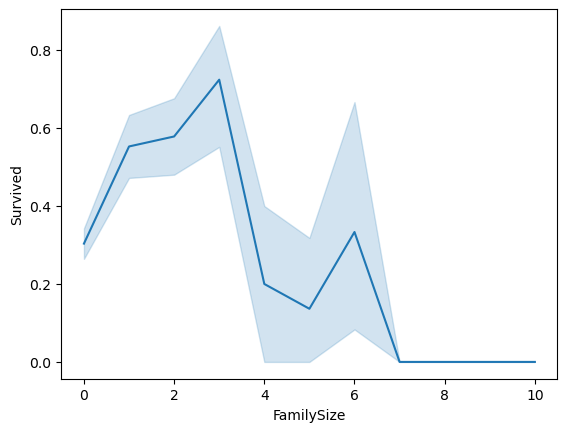

In [ ]:
plt.figure()
#sns.histplot(data=df, x='FamilySize', hue='Survived')
#correlation_matrix = df[['FamilySize','Survived']].corr()
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
sns.lineplot(data=df, x='FamilySize', y='Survived')

<Axes: xlabel='Alone', ylabel='Count'>

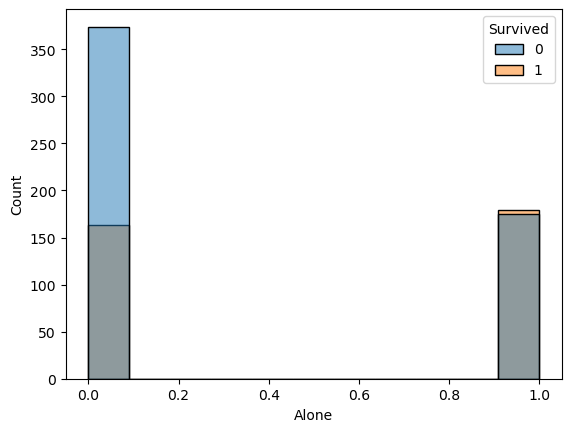

In [ ]:
plt.figure()
sns.histplot(data=df, x='Alone', hue='Survived')

<Axes: xlabel='Alone', ylabel='Survived'>

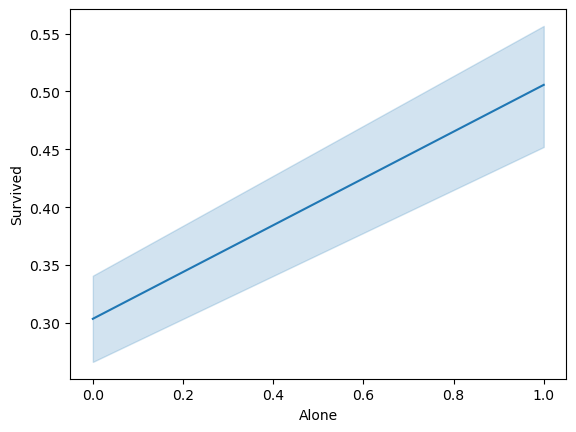

In [ ]:
plt.figure()
#sns.boxplot(x='Survived', y='FamilySize', data=df, hue= 'Survived')
#correlation_matrix = df[['Alone','Survived']].corr()
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
sns.lineplot(data=df, x='Alone', y='Survived')

In [ ]:
# 1. Convertir encoder_data en DataFrame avec les noms de colonnes appropriés
encoder_feature_names = encoder.get_feature_names_out(['Sex', 'Embarked'])
encoder_df = pd.DataFrame.sparse.from_spmatrix(
    encoder_data, 
    index=df.index, 
    columns=encoder_feature_names
)

# 2. Supprimer les colonnes catégorielles originales du dataframe
df_numeric = df.drop(['Sex', 'Embarked'], axis=1)

# 3. Concaténer le dataframe original (sans les colonnes catégorielles) avec le dataframe encodé
df_final = pd.concat([df_numeric, encoder_df], axis=1)

In [ ]:
df_final

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,FamilySize,Alone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,A/5 21171,7.2500,1,1,0,1.0,0,0,1.0
1,1,1,38.0,1,0,PC 17599,71.2833,1,1,1.0,0,1.0,0,0
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1.0,0,0,0,1.0
3,1,1,35.0,1,0,113803,53.1000,1,1,1.0,0,0,0,1.0
4,0,3,35.0,0,0,373450,8.0500,0,0,0,1.0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,211536,13.0000,0,0,0,1.0,0,0,1.0
887,1,1,19.0,0,0,112053,30.0000,0,0,1.0,0,0,0,1.0
888,0,3,28.0,1,2,W./C. 6607,23.4500,3,1,1.0,0,0,0,1.0
889,1,1,26.0,0,0,111369,30.0000,0,0,0,1.0,1.0,0,0


## Pipeline

### les transformateurs de données

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV


In [ ]:
var_numerique = ['Pclass','Age', 'Fare']
var_qualitative = ['Sex', 'Embarked']

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
class customTransformer(BaseEstimator, TransformerMixin):
    def __init__ (self, column_name, transform_type='sum'):
        self.column_name = column_name
        self.transform_type = transform_type
    def fit (self, x, y = None):
        return self # La méthode fit ne fait généralement rien pour les transformateurs 
    def transform (self, x) : 
        if self.transform_type == 'sum':
            x_transformed = x.copy()
            x_transformed[self.column_name] = x['Parch'] + x['SibSp']
            return x_transformed
        elif self.transform_type == 'binaire':
            x_transformed = x.copy()
            x_transformed[self.column_name] = x['FamilySize'].apply(lambda x: 0 if x < 1 else 1 )
            return x_transformed

In [ ]:
transfo_quanti = Pipeline(steps=[('imputation', SimpleImputer(strategy='median')),
                                 ('standardisation', StandardScaler())])
transfo_quali = Pipeline(steps=[('imputation', SimpleImputer(strategy='most_frequent', fill_value='manquant')),
                                 ('encodage', OneHotEncoder(handle_unknown='ignore'))])
custom_pipeline = Pipeline([
    ('family_size', customTransformer(column_name='FamilySize', transform_type='sum')),
    ('alone', customTransformer(column_name='Alone', transform_type='binaire'))
])
preprocessing = ColumnTransformer(
    transformers=[
        ('quantité', transfo_quanti, var_numerique),
        ('qualitative', transfo_quali, var_qualitative),
        ('custom', custom_pipeline, [])],
        remainder='passthrough')

In [ ]:
data_transform = preprocessing.fit_transform(data)

In [ ]:
model_1 = Pipeline(steps=[('preprocessing', preprocessing),
                          ('forest', RandomForestClassifier())])
x = data.drop('Survived', axis=1)
y = data['Survived']
#option1 avec cross validation seul
#x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
#cv_scores = cross_val_score(model_1, x, y, cv=5, scoring='accuracy')
#print(f"Scores de validation croisée: {cv_scores}")
#print(f"Score moyen: {cv_scores.mean():.2f}")

#model_1.fit(x, y)
#score = model_1.score(x_test, y_test)
#print(f"Score du modèle : {score:.2f}")
#option2 avec GridSearchCV
param_grid = {
    'forest__n_estimators': [100, 200, 300],
    'forest__max_depth': [None, 5, 10, 15],
    'forest__min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(model_1, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x,y)

# Afficher les meilleurs paramètres et le meilleur score
print(f"Meilleurs paramètres: {grid_search.best_params_}")
print(f"Meilleur score CV: {grid_search.best_score_:.2f}")

# Évaluer sur un ensemble de test séparé (optionnel)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
best_model = grid_search.best_estimator_
score = best_model.score(x_test, y_test)
print(f"Score du meilleur modèle sur l'ensemble de test: {score:.2f}")

Meilleurs paramètres: {'forest__max_depth': 15, 'forest__min_samples_split': 10, 'forest__n_estimators': 300}
Meilleur score CV: 0.83
Score du meilleur modèle sur l'ensemble de test: 0.92


### Matrix de confusion
#### on constate que :
- **le modèle identifie correctement 58 survivants et incorrectement 11 morts qui sont normalements des survivants**
- **le modèle identifie correctement 107 morts et incorrectement 3 survivants qui sont normalement morts**

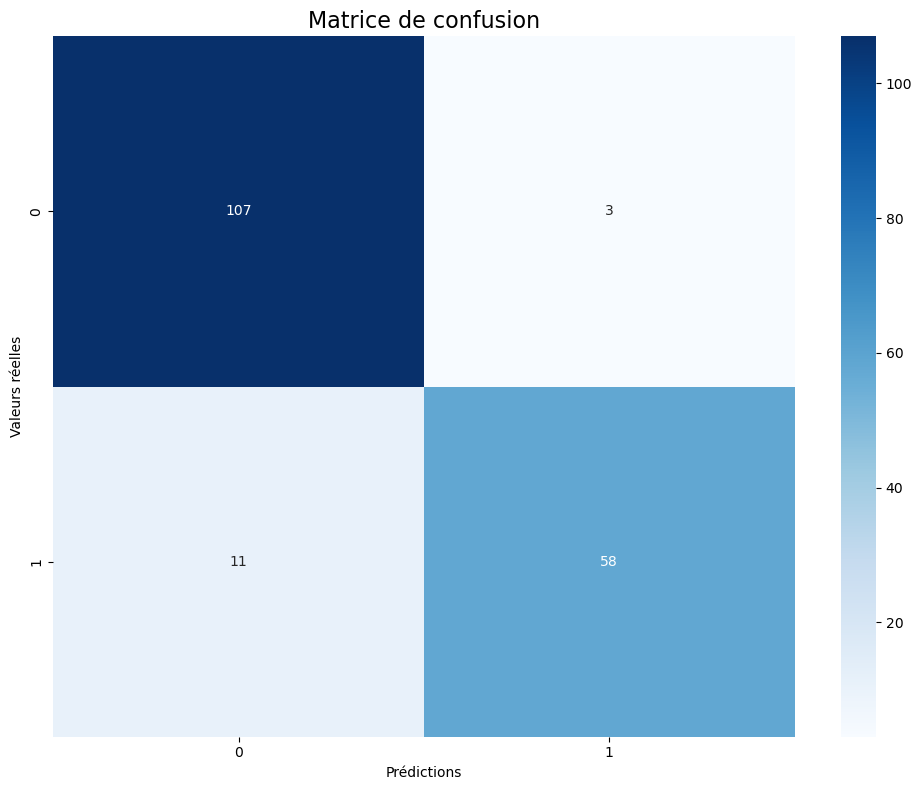

In [ ]:
from sklearn.metrics import confusion_matrix
# Créer la matrice de confusion
cm = confusion_matrix(y_test, best_model.predict(x_test))

# Créer une figure avec une taille spécifique
plt.figure(figsize=(10, 8))

# Créer une heatmap améliorée
sns.heatmap(cm, 
            annot=True,              # Afficher les valeurs dans chaque cellule
            fmt='d',                 # Format des nombres (entiers)
            cmap='Blues',            # Palette de couleurs
            xticklabels=best_model.classes_,  # Étiquettes des classes sur l'axe x
            yticklabels=best_model.classes_,  # Étiquettes des classes sur l'axe y
            cbar=True)               # Afficher la barre de couleur

# Ajouter des titres et des étiquettes
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')
plt.title('Matrice de confusion', fontsize=16)

# Ajuster la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()

### Learning curve 
##### le modèle donne des résultats plutôt satisfaisant , mais il peux être encore mieux améliorer peux être en lui fournissant plus de données.

[ 56 113 170 227 284 341 398 455 512 569]


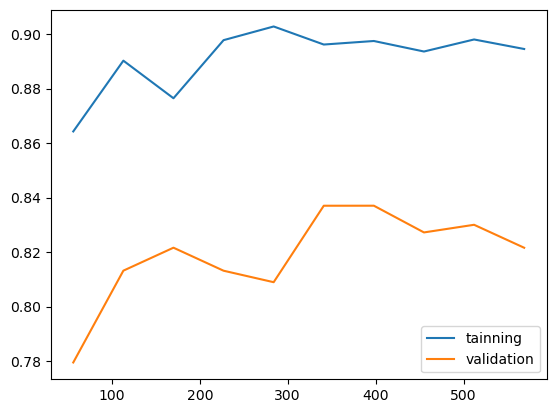

In [ ]:
from sklearn.model_selection import learning_curve
N, train_score, val_score = learning_curve(best_model, x_train, y_train, 
                                            train_sizes= np.linspace(.1,1.0,10), cv=5)
print(N)
plt.plot(N, train_score.mean(axis=1), label='tainning')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel='train_size'
plt.legend()

In [ ]:
predictions = best_model.predict(df_2)
df_2['Survived_predicted'] = predictions
df_2

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived_predicted
0,3,male,34.5,0,0,7.8292,Q,0
1,3,female,47.0,1,0,7.0000,S,0
2,2,male,62.0,0,0,9.6875,Q,0
3,3,male,27.0,0,0,8.6625,S,0
4,3,female,22.0,1,1,12.2875,S,1
...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S,0
414,1,female,39.0,0,0,108.9000,C,1
415,3,male,38.5,0,0,7.2500,S,0
416,3,male,NaN,0,0,8.0500,S,0
